# 📊 Sales Trend Analysis Using Aggregations
Analyze **monthly revenue** and **order volume** using SQL queries.

## 📌 Objective
- Connect to a database
- Run SQL queries to calculate monthly revenue and order volume
- Display results in Python

### Dataset
Table: `orders`
- `order_id`
- `order_date`
- `amount`
- `product_id`

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# Create SQLite database and sample orders table
conn = sqlite3.connect("online_sales.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER,
    order_date TEXT,
    amount REAL,
    product_id INTEGER
);
""")

# Clear and insert dummy data
cursor.execute("DELETE FROM orders")
sample_data = [
    (1, '2023-01-15', 200, 101),
    (2, '2023-01-20', 150, 102),
    (3, '2023-02-05', 300, 103),
    (4, '2023-02-15', 250, 104),
    (5, '2023-03-10', 500, 105),
    (6, '2023-03-25', 100, 101),
    (7, '2023-03-30', 400, 102),
]
cursor.executemany("INSERT INTO orders VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

print("✅ Sample database created with dummy orders.")

✅ Sample database created with dummy orders.


In [ ]:
# SQL Query: Monthly revenue and order volume
query = """
SELECT
    strftime('%Y', order_date) AS year,
    strftime('%m', order_date) AS month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS order_volume
FROM orders
GROUP BY year, month
ORDER BY year, month;
"""

df = pd.read_sql_query(query, conn)
df

,year,month,total_revenue,order_volume
0,2023,01,350.0,2
1,2023,02,550.0,2
2,2023,03,1000.0,3


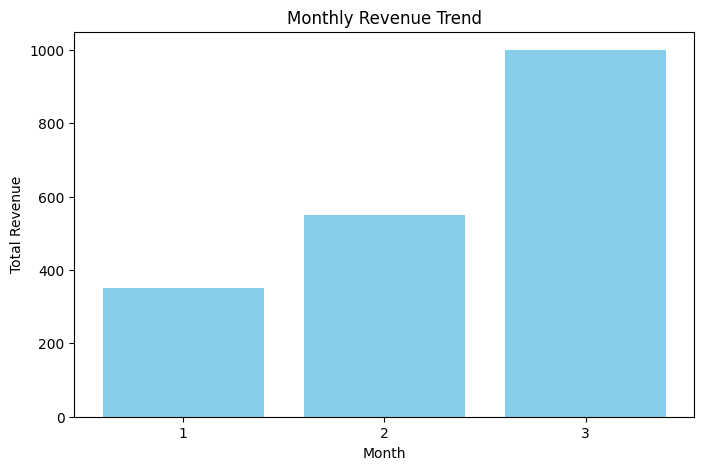

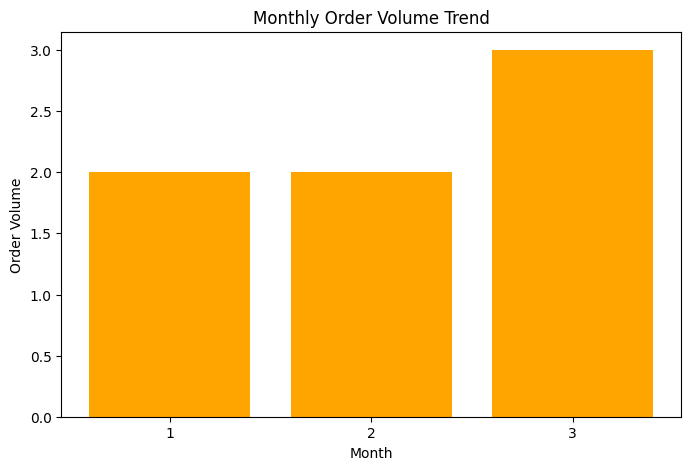

In [ ]:
import matplotlib.pyplot as plt

# Convert month to integer for proper sorting
df['month'] = df['month'].astype(int)

# Plot revenue trend
plt.figure(figsize=(8,5))
plt.bar(df['month'], df['total_revenue'], color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(df['month'])
plt.show()

# Plot order volume trend
plt.figure(figsize=(8,5))
plt.bar(df['month'], df['order_volume'], color='orange')
plt.xlabel("Month")
plt.ylabel("Order Volume")
plt.title("Monthly Order Volume Trend")
plt.xticks(df['month'])
plt.show()


## 🔍 Observations
- Grouped sales by **year and month**.
- Calculated **total revenue** with `SUM(amount)`.
- Calculated **order volume** with `COUNT(DISTINCT order_id)`.
- Sorted results to see monthly trends clearly.

## ✅ Outcome
By completing this task, we practiced:
- SQL aggregations and date functions
- Using SQLite with Python
- Summarizing sales by month
- Identifying revenue and order trends